In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import captum.optim as optimviz
from inceptionv1 import model as inceptionv1
import prior_optimization

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /home/kevin/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

In [4]:
target = inceptionv1.fc
channel = 309

print(target)

Linear(in_features=1024, out_features=1000, bias=True)


Running on channel: 50
Running optim with lr 0.025 reg 0


  0%|          | 0/256 [00:00<?, ? step/s]

L2 of class vector = tensor(18.6687, device='cuda:0', grad_fn=<SumBackward0>)


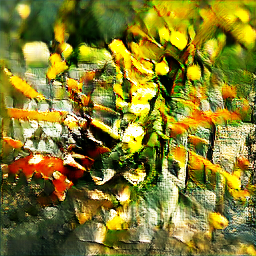

Final loss: -16.737755
Running on channel: 51
Running optim with lr 0.025 reg 0


  0%|          | 0/256 [00:00<?, ? step/s]

L2 of class vector = tensor(13.6195, device='cuda:0', grad_fn=<SumBackward0>)


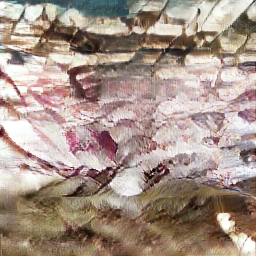

Final loss: -81.3563
Running on channel: 52
Running optim with lr 0.025 reg 0


  0%|          | 0/256 [00:00<?, ? step/s]

L2 of class vector = tensor(9.0582, device='cuda:0', grad_fn=<SumBackward0>)


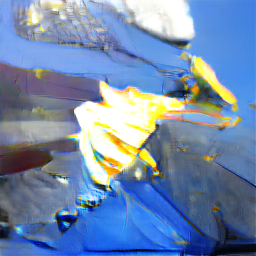

Final loss: -55.14863
Running on channel: 53
Running optim with lr 0.025 reg 0


  0%|          | 0/256 [00:00<?, ? step/s]

L2 of class vector = tensor(4.5960, device='cuda:0', grad_fn=<SumBackward0>)


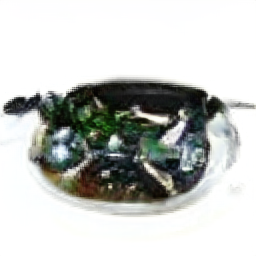

Final loss: -78.20494
Running on channel: 54
Running optim with lr 0.025 reg 0


  0%|          | 0/256 [00:00<?, ? step/s]

L2 of class vector = tensor(8.8601, device='cuda:0', grad_fn=<SumBackward0>)


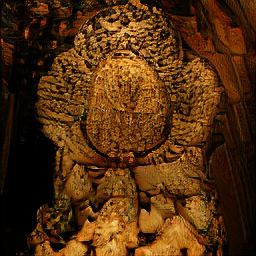

Final loss: 1.6027186
Running on channel: 55
Running optim with lr 0.025 reg 0


  0%|          | 0/256 [00:00<?, ? step/s]

L2 of class vector = tensor(3.3938, device='cuda:0', grad_fn=<SumBackward0>)


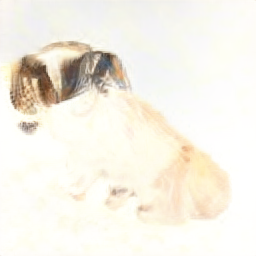

Final loss: -65.040726
Running on channel: 56
Running optim with lr 0.025 reg 0


  0%|          | 0/256 [00:00<?, ? step/s]

L2 of class vector = tensor(6.3303, device='cuda:0', grad_fn=<SumBackward0>)


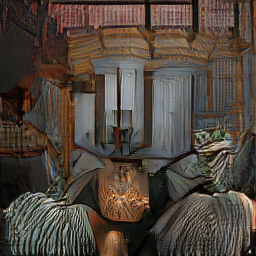

Final loss: 11.800695
Running on channel: 57
Running optim with lr 0.025 reg 0


  0%|          | 0/256 [00:00<?, ? step/s]

L2 of class vector = tensor(6.7500, device='cuda:0', grad_fn=<SumBackward0>)


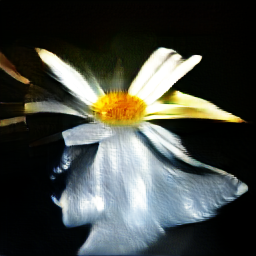

Final loss: -19.81783
Running on channel: 58
Running optim with lr 0.025 reg 0


  0%|          | 0/256 [00:00<?, ? step/s]

L2 of class vector = tensor(7.5725, device='cuda:0', grad_fn=<SumBackward0>)


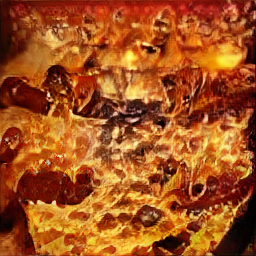

Final loss: -16.225676
Running on channel: 59
Running optim with lr 0.025 reg 0


  0%|          | 0/256 [00:00<?, ? step/s]

In [ ]:
# Magic testing
lr = 0.025

for channel in range(50, 70):
    print("Running on channel:", channel)
    biggan_input, loss_history, class_vector = prior_optimization.create_optimized_image(target=target, channel=channel, n_steps=256, lr=lr, reg=0, verbose=True)
    prior_optimization.display_optimized_image(biggan_input)
    loss_history = loss_history.cpu().detach().numpy()
    print("Final loss:", loss_history[-1])

Running on channel: 50
Running optim with lr 1.0 reg 0
L2 of class vector = tensor(36066.2852, device='cuda:0', grad_fn=<SumBackward0>)
Final loss: 13.019397
Running on channel: 51
Running optim with lr 1.0 reg 0
L2 of class vector = tensor(36065.2031, device='cuda:0', grad_fn=<SumBackward0>)
Final loss: 25.24048
Running on channel: 52
Running optim with lr 1.0 reg 0
L2 of class vector = tensor(36066.3320, device='cuda:0', grad_fn=<SumBackward0>)
Final loss: 3.2752647
Running on channel: 53
Running optim with lr 1.0 reg 0
L2 of class vector = tensor(36066.3789, device='cuda:0', grad_fn=<SumBackward0>)
Final loss: 11.407717
Running on channel: 54
Running optim with lr 1.0 reg 0
L2 of class vector = tensor(36065.9727, device='cuda:0', grad_fn=<SumBackward0>)
Final loss: 12.12416
Running on channel: 55
Running optim with lr 1.0 reg 0
L2 of class vector = tensor(36065.5859, device='cuda:0', grad_fn=<SumBackward0>)
Final loss: 15.075287
Running on channel: 56
Running optim with lr 1.0 reg 0

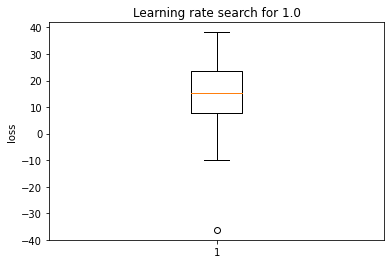

Running on channel: 50
Running optim with lr 0.14677992676220694 reg 0


In [ ]:
from prior_optimization import create_optimized_image, display_optimized_image
import matplotlib.pyplot as plt
import numpy as np


for lr in np.logspace(0, -5, 7):
    losses = []
    for channel in range(50, 70):
        print("Running on channel:", channel)
        biggan_input, loss_history, class_vector = create_optimized_image(target=target, channel=channel, n_steps=256, lr=lr, reg=0, verbose=False)
#         display_optimized_image(biggan_input)
        loss_history = loss_history.cpu().detach().numpy()
        print("Final loss:", loss_history[-1])
        avg_loss = np.mean(loss_history[-5:-1])
        losses.append(avg_loss)
    plt.title(f"Learning rate search for {lr}")
    plt.ylabel("loss")
#     plt.xlabel("steps")
    plt.boxplot(losses)
    plt.savefig(f"lr-{lr}.png")
    plt.show()